In [1]:
from hashring import HashRing
import random

In [4]:
# add 15 nodes to the ring
num_servers = 3
hashring = HashRing(hashtype = "md5")
for i in range(num_servers):
    hashring.add_server("node%d" % i)

request_count = {}
for i in range(10000):
    request_id = random.randint(0, 999999)
    server = hashring.get_server(request_id)
    if server not in request_count:
        request_count[server] = 1
    else:
        request_count[server] += 1

print(request_count)

{'node0': 3951, 'node1': 3581, 'node2': 2468}


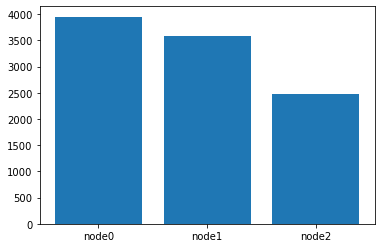

In [7]:
# plot the distribution of requests
import matplotlib.pyplot as plt
plt.bar(range(len(request_count)), request_count.values(), align='center')
plt.xticks(range(len(request_count)), request_count.keys())
plt.show()

In [11]:
for hash_type in ["default", "md5", "sha256", "custom"]:
    for num_servers in range(2, 7):
        hashring = HashRing(hashtype = hash_type)
        for i in range(num_servers):
            hashring.add_server("node%d" % i)

        request_count = {}
        for i in range(10000):
            request_id = random.randint(100000, 999999)
            server = hashring.get_server(request_id)
            if server not in request_count:
                request_count[server] = 1
            else:
                request_count[server] += 1

        # uniformity score
        uniformity_score = 0
        
        for server in request_count:
            uniformity_score += (request_count[server]/10000) ** 2
        
        print("hash_type: %s, num_servers: %d, uniformity_score: %f" % (hash_type, num_servers, uniformity_score))

        # plt.bar(range(num_servers), request_count)
        # plt.show()

    # print(request_count)

hash_type: default, num_servers: 2, uniformity_score: 0.913504
hash_type: default, num_servers: 3, uniformity_score: 0.723677
hash_type: default, num_servers: 4, uniformity_score: 0.660919
hash_type: default, num_servers: 5, uniformity_score: 0.602142
hash_type: default, num_servers: 6, uniformity_score: 0.539209
hash_type: md5, num_servers: 2, uniformity_score: 0.501049
hash_type: md5, num_servers: 3, uniformity_score: 0.342936
hash_type: md5, num_servers: 4, uniformity_score: 0.288157
hash_type: md5, num_servers: 5, uniformity_score: 0.231091
hash_type: md5, num_servers: 6, uniformity_score: 0.185991
hash_type: sha256, num_servers: 2, uniformity_score: 0.510834
hash_type: sha256, num_servers: 3, uniformity_score: 0.389611
hash_type: sha256, num_servers: 4, uniformity_score: 0.297813
hash_type: sha256, num_servers: 5, uniformity_score: 0.220163
hash_type: sha256, num_servers: 6, uniformity_score: 0.192774
hash_type: custom, num_servers: 2, uniformity_score: 0.502535
hash_type: custom,